In [1]:
import os
from scipy.io import arff
import matplotlib.pyplot as plt
import numpy as np
from source.jabba import QABBA

_dir = 'UEA2018'

def preprocess(data):
    time_series = list()
    for ii in data[0]:
        database = list()
        for i in ii[0]:
            database.append(list(i))
        time_series.append(database)
    return np.nan_to_num(np.array(time_series))

# LSST(6), ERing(6),Libras(2), PenDigits(2),  StandWalkJump(4), AtrialFibrillation(4)

(204, 61, 405)
Generate 1846 symbols
Generate 1846 symbols


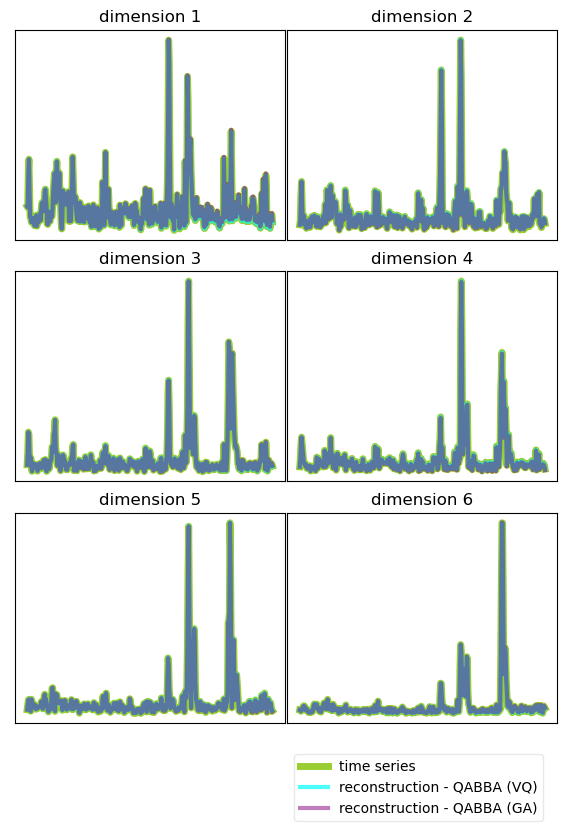

In [3]:
filename = 'Heartbeat'
num= 10
data = arff.loadarff(os.path.join(_dir, os.path.join(filename, filename+'_TRAIN.arff')))
multivariate_ts = preprocess(data)
mts =((multivariate_ts[num].T - multivariate_ts[num].T.mean(axis=0)) /multivariate_ts[num].T.std(axis=0)).T
print(multivariate_ts.shape)

pabba1 = QABBA(tol=0.0001, verbose=1)
symbols_series = pabba1.fit_transform(mts)
reconstruction = pabba1.inverse_transform(symbols_series)

pabba2 = QABBA(tol=0.0001, init='kmeans', k=pabba1.parameters.centers.shape[0], verbose=1)
symbols_series = pabba2.fit_transform(mts)
reconstruction_ABBA = pabba2.inverse_transform(symbols_series)

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(7, 9))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=0.15)
for i in range(3):
    for j in range(2):
        # print("".join(symbols_series[i]))
        ax[i,j].plot(mts[i*2 + j], c='yellowgreen', linewidth=5,label='time series')
        ax[i,j].plot(reconstruction_ABBA[i*2 + j], c='cyan', linewidth=3, alpha=0.7, label='reconstruction - QABBA (VQ)')
        ax[i,j].plot(reconstruction[i*2 + j], c='purple', linewidth=3, alpha=0.5, label='reconstruction - QABBA (GA)')
        
        ax[i,j].set_title('dimension '+str(i*2 + j + 1))
        ax[i,j].set_xticks([]);ax[i,j].set_yticks([])
        
plt.legend(loc='lower left', bbox_to_anchor=[0, -0.5], ncols=1, framealpha=0.45)
plt.savefig('figs/Heartbeat1.png', bbox_inches='tight')
plt.show()

In [4]:
pabba1.parameters.centers

array([[ -127., -3372.],
       [ -127., -3356.],
       [ -127., -3388.],
       ...,
       [   77., -3285.],
       [   77., -3489.],
       [  127., -3378.]])

In [11]:
pabba1.start_set

[0.10131615954050932,
 -0.49047951220885516,
 -0.2972214734670834,
 -0.3867199708577607,
 -0.38860376293764337,
 -0.20543537255761912,
 -0.22953623519003055,
 -0.27802137313196496,
 -0.22595874903842209,
 -0.27158094541018574,
 -0.279317087866842,
 -0.3190085411415283,
 -0.29711632377992414,
 -0.2630559769312051,
 -0.2735214501530469,
 -0.33805046406797457,
 -0.2605610601609798,
 -0.0455736028550749,
 -0.13949351750305986,
 -0.32812662748876537,
 -0.2711173845515455,
 -0.3229881450378015,
 -0.194651053156662,
 -0.24791995848516687,
 -0.26374911578119475,
 -0.2958261444844137,
 -0.22052448715026113,
 -0.23744711782580968,
 -0.17716278065187147,
 -0.3872277485102177,
 -0.30570423066435864,
 -0.42766965875502955,
 0.007989521227460316,
 -0.2112848583641353,
 0.08132695647547503,
 -0.24271895925439502,
 -0.11098746987284559,
 -0.43951402004591106,
 -0.39530086094330635,
 -0.2698856058914377,
 -0.23491534207731393,
 -0.42972617875516317,
 -0.3019308378863292,
 -0.40407507165122253,
 -0.4656

(204, 61, 405)
Generate 1846 symbols
Generate 1846 symbols


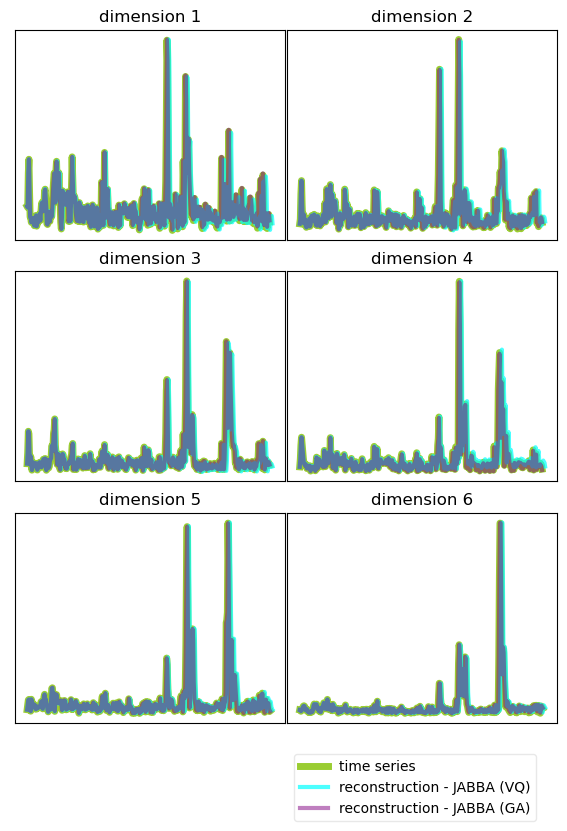

In [3]:
filename = 'Heartbeat'
num= 10
data = arff.loadarff(os.path.join(_dir, os.path.join(filename, filename+'_TRAIN.arff')))
multivariate_ts = preprocess(data)
mts =((multivariate_ts[num].T - multivariate_ts[num].T.mean(axis=0)) /multivariate_ts[num].T.std(axis=0)).T
print(multivariate_ts.shape)

pabba1 = QABBA(tol=0.0001, verbose=1)
symbols_series = pabba1.fit_transform(mts)
reconstruction = pabba1.inverse_transform(symbols_series)

pabba2 = QABBA(tol=0.0001, init='f-kmeans', k=pabba1.parameters.centers.shape[0], verbose=1)
symbols_series = pabba2.fit_transform(mts)
reconstruction_ABBA = pabba2.inverse_transform(symbols_series)

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(7, 9))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=0.15)

for i in range(3):
    for j in range(2):
        # print("".join(symbols_series[i]))
        ax[i,j].plot(mts[i*2 + j], c='yellowgreen', linewidth=5,label='time series')
        ax[i,j].plot(reconstruction_ABBA[i*2 + j], c='cyan', linewidth=3, alpha=0.7, label='reconstruction - JABBA (VQ)')
        ax[i,j].plot(reconstruction[i*2 + j], c='purple', linewidth=3, alpha=0.5, label='reconstruction - JABBA (GA)')
        
        ax[i,j].set_title('dimension '+str(i*2 + j + 1))
        ax[i,j].set_xticks([]);ax[i,j].set_yticks([])
        
plt.legend(loc='lower left', bbox_to_anchor=[0, -0.5], ncols=1, framealpha=0.45)
plt.savefig('figs/Heartbeat.png', bbox_inches='tight')
plt.show()

(12, 4, 2500)
Generate 317 symbols
Generate 317 symbols


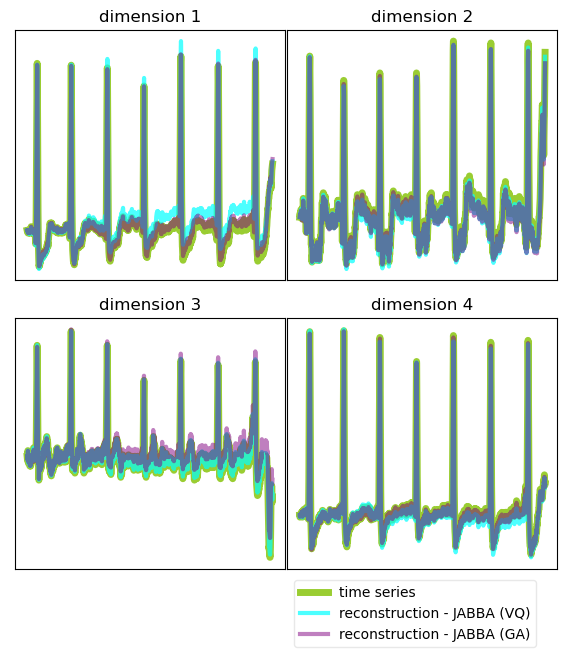

In [3]:
filename = 'StandWalkJump'
num= 10
data = arff.loadarff(os.path.join(_dir, os.path.join(filename, filename+'_TRAIN.arff')))
multivariate_ts = preprocess(data)
mts =((multivariate_ts[num].T - multivariate_ts[num].T.mean(axis=0)) /multivariate_ts[num].T.std(axis=0)).T
print(multivariate_ts.shape)

pabba1 = JABBA(tol=0.001, sorting='norm',verbose=1)
symbols_series = pabba1.fit_transform(mts)
reconstruction = pabba1.inverse_transform(symbols_series)

pabba2 = JABBA(tol=0.001, init='f-kmeans', k=pabba1.parameters.centers.shape[0], verbose=1)
symbols_series = pabba2.fit_transform(mts)
reconstruction_ABBA = pabba2.inverse_transform(symbols_series)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=0.15)
for i in range(2):
    for j in range(2):
        # print("".join(symbols_series[i]))
        ax[i,j].plot(mts[i*2 + j], c='yellowgreen', linewidth=5,label='time series')
        ax[i,j].plot(reconstruction_ABBA[i*2 + j], c='cyan', linewidth=3, alpha=0.7, label='reconstruction - JABBA (VQ)')
        ax[i,j].plot(reconstruction[i*2 + j], c='purple', linewidth=3, alpha=0.5, label='reconstruction - JABBA (GA)')
        
        ax[i,j].set_title('dimension '+str(i*2 + j + 1))
        ax[i,j].set_xticks([]);ax[i,j].set_yticks([])
        
plt.legend(loc='lower left', bbox_to_anchor=[0, -0.34], ncols=1, framealpha=0.45)
plt.savefig('figs/StandWalkJump.png', bbox_inches='tight')
plt.show()

In [11]:
filename = 'BasicMotions'
num= 10
data = arff.loadarff(os.path.join(_dir, os.path.join(filename, filename+'_TRAIN.arff')))
multivariate_ts = preprocess(data)
mts =((multivariate_ts[num].T - multivariate_ts[num].T.mean(axis=0)) /multivariate_ts[num].T.std(axis=0)).T
print(multivariate_ts.shape)

pabba = PABBA(tol=0.01, max_iter=100, verbose=1)
symbols_series = pabba.fit_transform(mts, n_jobs=4)
reconstruction = pabba.inverse_transform(symbols_series, n_jobs=4)

for i in range(multivariate_ts.shape[1]):
    print("".join(symbols_series[i]))
    plt.figure(figsize=(6,4.8))
    plt.plot(mts[i], c='yellowgreen', linewidth=5,label='time series')
    plt.plot(reconstruction[i], c='purple', linewidth=5, alpha=0.3, label='reconstruction')
    plt.legend(loc='lower right', framealpha=0.45)
    plt.title('dimension '+str(i+1))
    plt.grid(False) 
    plt.xticks([]),plt.yticks([])
    plt.savefig('img/BasicMotions_'+str(i+1)+'.pdf', bbox_inches='tight')
    plt.show()

(40, 6, 100)


NameError: name 'PABBA' is not defined

### ArticularyWordRecognition

(275, 9, 144)
Generate 20 symbols
ebC


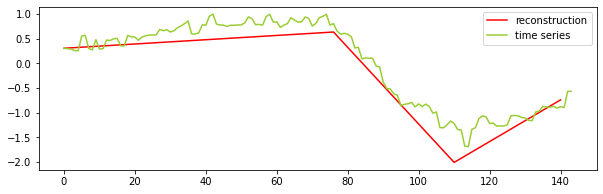

cbCH


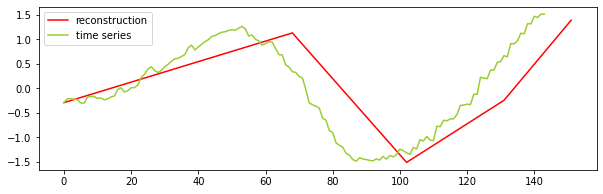

cbCh


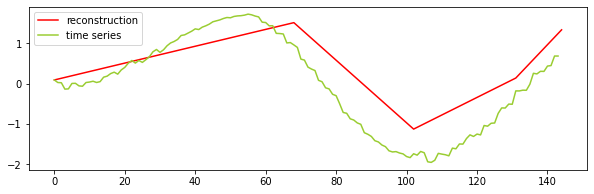

eFf


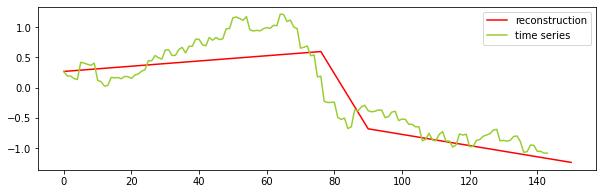

fGD


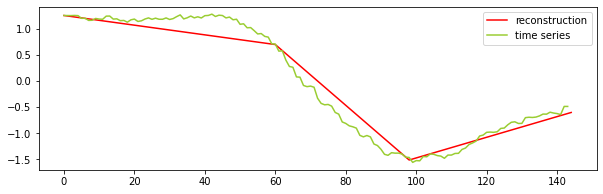

IcB


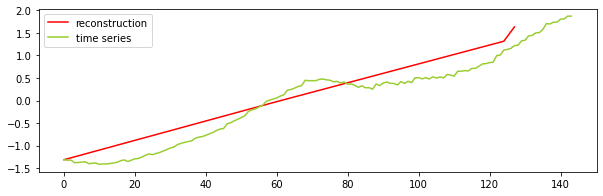

adADaBGaAaBai


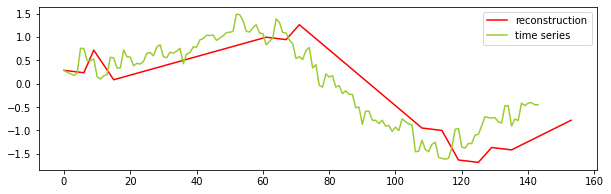

AaEJEAdaAEABAgFB


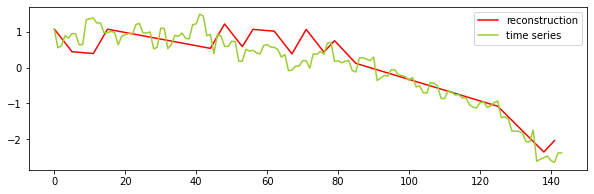

BADAAgaAdj


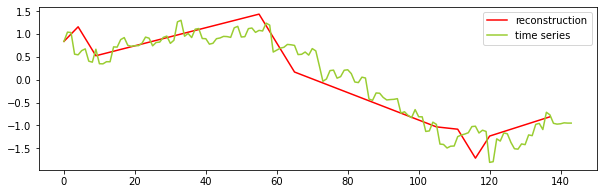

In [3]:
filename = 'ArticularyWordRecognition'
data = arff.loadarff(os.path.join(_dir, os.path.join(filename, filename+'_TRAIN.arff')))
multivariate_ts = preprocess(data)
multivariate_ts = multivariate_ts - multivariate_ts.mean(axis=0)/multivariate_ts.std(axis=0)
print(multivariate_ts.shape)

pabba = PABBA(tol=0.1, init='f-kmeans', k=20, verbose=1)
symbols_series = pabba.fit_transform(multivariate_ts[0], n_jobs=2)
reconstruction = pabba.inverse_transform(symbols_series, n_jobs=2)

for i in range(multivariate_ts.shape[1]):
    plt.figure(figsize=(10,3))
    print("".join(symbols_series[i]))
    plt.plot(reconstruction[i], c='r', label='reconstruction')
    plt.plot(multivariate_ts[0][i], c='yellowgreen', label='time series')
    plt.legend()
    plt.show()

### SelfRegulationSCP1

(268, 6, 896)
Generate 32 symbols
bApadCeggkLCBbEcEEcEBagBBdCBGBaaliAeCAaIabAECbAFebGAacFbEAbEbHjADLeJBIAbEccKaBdadAhcChaFEaAgdeCabAchcbAbCJBdeJdaccAHAaaDfbEacbdAeddgaBAEbHbFEbcCaBCBFdDgkkDacHEbbIAEcafBDCBCdDBfHAEbBGAHbFECaCBCdCJCDbCBCBegDeBcHEFcBgeBDBcbEaAAIjEababAaABBDBACIACDaBCDbJCdCBdDdGAFbFbabeDCahNFcaDDgDCCbGAfAAnMcbAaBDLDBCcFcFHEKCBedekDegiDaiBfGACaAmAaadbaAFKcbEabACfaBDBeCDaDbcAEbCAiBAbcEAADDDeBaGEAEHEEFeADdGaAacAfCdaBdJgeBaCFFEbaABaAaACaeBDeBCKEFEIGaaGABAaAaBaDeBdBACABbaAcAAhajcAadgeDBCabCEaAbBhaKbCaBaBCAabAbEcaEfDaGBGBeCdACjcHAaCegDdCaAAbcCDAdDBCBBbcAcacCaAIAafAaAbffCCfHdFAabaIbfbBaBdaCBbaAOkdeaBbBbGdcCbFcbhabahAmBadCaBbobacBbdBJBACaDCaAgCBDbcjbIahABiLdaDbcBbABcabAbFEEbbBACcBbCdBDdCdeGAAcbcHFHcEbaBICAEaaAiiAfbCAfaCfCAlGaADbACBaDCAacAAefAcMcEaAABBJaCcAKFbFEcCdgkPdedbBaBbDhcFFHAAAgdDBfjECbGBGBaiCAhBb


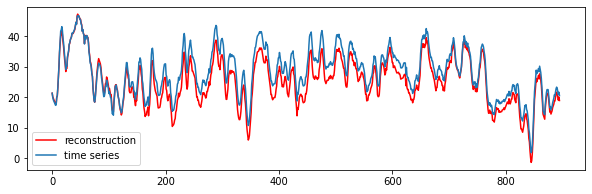

adCeggkLCBbEcEEcEBagBBdCBGBaaliAeCAaIabAECbAFebGAacFbEAbEbHjADLeJBIAbEccKaBdadAhcChaFEaAgdeCabAchcbAbCJBdeJdaccAHAaaDfbEacbdAeddgaBAEbHbFEbcCaBCBFdDgkkDacHEbbIAEcafBDCBCdDBfHAEbBGAHbFECaCBCdCJCDbCBCBegDeBcHEFcBgeBDBcbEaAAIjEababAaABBDBACIACDaBCDbJCdCBdDdGAFbFbabeDCahNFcaDDgDCCbGAfAAnMcbAaBDLDBCcFcFHEKCBedekDegiDaiBfGACaAmAaadbaAFKcbEabACfaBDBeCDaDbcAEbCAiBAbcEAADDDeBaGEAEHEEFeADdGaAacAfCdaBdJgeBaCFFEbaABaAaACaeBDeBCKEFEIGaaGABAaAaBaDeBdBACABbaAcAAhajcAadgeDBCabCEaAbBhaKbCaBaBCAabAbEcaEfDaGBGBeCdACjcHAaCegDdCaAAbcCDAdDBCBBbcAcacCaAIAafAaAbffCCfHdFAabaIbfbBaBdaCBbaAOkdeaBbBbGdcCbFcbhabahAmBadCaBbobacBbdBJBACaDCaAgCBDbcjbIahABiLdaDbcBbABcabAbFEEbbBACcBbCdBDdCdeGAAcbcHFHcEbaBICAEaaAiiAfbCAfaCfCAlGaADbACBaDCAacAAefAcMcEaAABBJaCcAKFbFEcCdgkPdedbBaBbDhcFFHAAAgdDBfjECbGBGBaiCAhBbgBiad


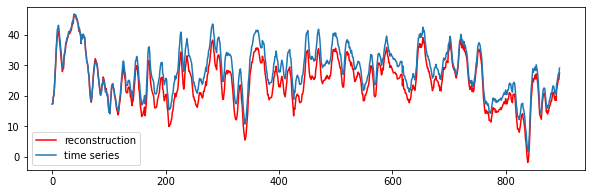

kLCBbEcEEcEBagBBdCBGBaaliAeCAaIabAECbAFebGAacFbEAbEbHjADLeJBIAbEccKaBdadAhcChaFEaAgdeCabAchcbAbCJBdeJdaccAHAaaDfbEacbdAeddgaBAEbHbFEbcCaBCBFdDgkkDacHEbbIAEcafBDCBCdDBfHAEbBGAHbFECaCBCdCJCDbCBCBegDeBcHEFcBgeBDBcbEaAAIjEababAaABBDBACIACDaBCDbJCdCBdDdGAFbFbabeDCahNFcaDDgDCCbGAfAAnMcbAaBDLDBCcFcFHEKCBedekDegiDaiBfGACaAmAaadbaAFKcbEabACfaBDBeCDaDbcAEbCAiBAbcEAADDDeBaGEAEHEEFeADdGaAacAfCdaBdJgeBaCFFEbaABaAaACaeBDeBCKEFEIGaaGABAaAaBaDeBdBACABbaAcAAhajcAadgeDBCabCEaAbBhaKbCaBaBCAabAbEcaEfDaGBGBeCdACjcHAaCegDdCaAAbcCDAdDBCBBbcAcacCaAIAafAaAbffCCfHdFAabaIbfbBaBdaCBbaAOkdeaBbBbGdcCbFcbhabahAmBadCaBbobacBbdBJBACaDCaAgCBDbcjbIahABiLdaDbcBbABcabAbFEEbbBACcBbCdBDdCdeGAAcbcHFHcEbaBICAEaaAiiAfbCAfaCfCAlGaADbACBaDCAacAAefAcMcEaAABBJaCcAKFbFEcCdgkPdedbBaBbDhcFFHAAAgdDBfjECbGBGBaiCAhBbgBiadCBCBde


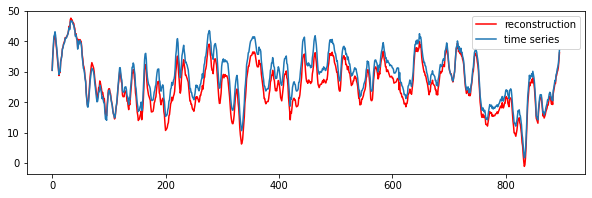

EcEEcEBagBBdCBGBaaliAeCAaIabAECbAFebGAacFbEAbEbHjADLeJBIAbEccKaBdadAhcChaFEaAgdeCabAchcbAbCJBdeJdaccAHAaaDfbEacbdAeddgaBAEbHbFEbcCaBCBFdDgkkDacHEbbIAEcafBDCBCdDBfHAEbBGAHbFECaCBCdCJCDbCBCBegDeBcHEFcBgeBDBcbEaAAIjEababAaABBDBACIACDaBCDbJCdCBdDdGAFbFbabeDCahNFcaDDgDCCbGAfAAnMcbAaBDLDBCcFcFHEKCBedekDegiDaiBfGACaAmAaadbaAFKcbEabACfaBDBeCDaDbcAEbCAiBAbcEAADDDeBaGEAEHEEFeADdGaAacAfCdaBdJgeBaCFFEbaABaAaACaeBDeBCKEFEIGaaGABAaAaBaDeBdBACABbaAcAAhajcAadgeDBCabCEaAbBhaKbCaBaBCAabAbEcaEfDaGBGBeCdACjcHAaCegDdCaAAbcCDAdDBCBBbcAcacCaAIAafAaAbffCCfHdFAabaIbfbBaBdaCBbaAOkdeaBbBbGdcCbFcbhabahAmBadCaBbobacBbdBJBACaDCaAgCBDbcjbIahABiLdaDbcBbABcabAbFEEbbBACcBbCdBDdCdeGAAcbcHFHcEbaBICAEaaAiiAfbCAfaCfCAlGaADbACBaDCAacAAefAcMcEaAABBJaCcAKFbFEcCdgkPdedbBaBbDhcFFHAAAgdDBfjECbGBGBaiCAhBbgBiadCBCBdegegdBa


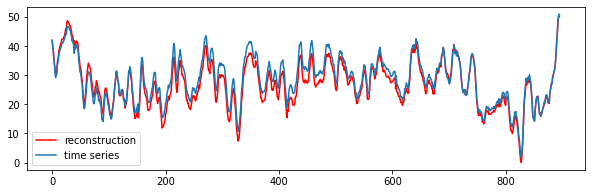

BagBBdCBGBaaliAeCAaIabAECbAFebGAacFbEAbEbHjADLeJBIAbEccKaBdadAhcChaFEaAgdeCabAchcbAbCJBdeJdaccAHAaaDfbEacbdAeddgaBAEbHbFEbcCaBCBFdDgkkDacHEbbIAEcafBDCBCdDBfHAEbBGAHbFECaCBCdCJCDbCBCBegDeBcHEFcBgeBDBcbEaAAIjEababAaABBDBACIACDaBCDbJCdCBdDdGAFbFbabeDCahNFcaDDgDCCbGAfAAnMcbAaBDLDBCcFcFHEKCBedekDegiDaiBfGACaAmAaadbaAFKcbEabACfaBDBeCDaDbcAEbCAiBAbcEAADDDeBaGEAEHEEFeADdGaAacAfCdaBdJgeBaCFFEbaABaAaACaeBDeBCKEFEIGaaGABAaAaBaDeBdBACABbaAcAAhajcAadgeDBCabCEaAbBhaKbCaBaBCAabAbEcaEfDaGBGBeCdACjcHAaCegDdCaAAbcCDAdDBCBBbcAcacCaAIAafAaAbffCCfHdFAabaIbfbBaBdaCBbaAOkdeaBbBbGdcCbFcbhabahAmBadCaBbobacBbdBJBACaDCaAgCBDbcjbIahABiLdaDbcBbABcabAbFEEbbBACcBbCdBDdCdeGAAcbcHFHcEbaBICAEaaAiiAfbCAfaCfCAlGaADbACBaDCAacAAefAcMcEaAABBJaCcAKFbFEcCdgkPdedbBaBbDhcFFHAAAgdDBfjECbGBGBaiCAhBbgBiadCBCBdegegdBfEcEbc


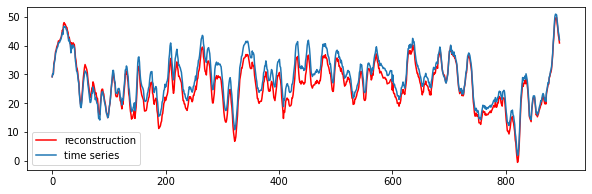

CBGBaaliAeCAaIabAECbAFebGAacFbEAbEbHjADLeJBIAbEccKaBdadAhcChaFEaAgdeCabAchcbAbCJBdeJdaccAHAaaDfbEacbdAeddgaBAEbHbFEbcCaBCBFdDgkkDacHEbbIAEcafBDCBCdDBfHAEbBGAHbFECaCBCdCJCDbCBCBegDeBcHEFcBgeBDBcbEaAAIjEababAaABBDBACIACDaBCDbJCdCBdDdGAFbFbabeDCahNFcaDDgDCCbGAfAAnMcbAaBDLDBCcFcFHEKCBedekDegiDaiBfGACaAmAaadbaAFKcbEabACfaBDBeCDaDbcAEbCAiBAbcEAADDDeBaGEAEHEEFeADdGaAacAfCdaBdJgeBaCFFEbaABaAaACaeBDeBCKEFEIGaaGABAaAaBaDeBdBACABbaAcAAhajcAadgeDBCabCEaAbBhaKbCaBaBCAabAbEcaEfDaGBGBeCdACjcHAaCegDdCaAAbcCDAdDBCBBbcAcacCaAIAafAaAbffCCfHdFAabaIbfbBaBdaCBbaAOkdeaBbBbGdcCbFcbhabahAmBadCaBbobacBbdBJBACaDCaAgCBDbcjbIahABiLdaDbcBbABcabAbFEEbbBACcBbCdBDdCdeGAAcbcHFHcEbaBICAEaaAiiAfbCAfaCfCAlGaADbACBaDCAacAAefAcMcEaAABBJaCcAKFbFEcCdgkPdedbBaBbDhcFFHAAAgdDBfjECbGBGBaiCAhBbgBiadCBCBdegegdBfEcEbcbCAgCD


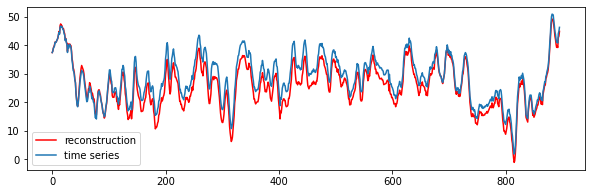

In [4]:
filename = 'SelfRegulationSCP1'
data = arff.loadarff(os.path.join(_dir, os.path.join(filename, filename+'_TRAIN.arff')))
multivariate_ts = preprocess(data)
multivariate_ts = multivariate_ts - multivariate_ts.mean(axis=0)/multivariate_ts.std(axis=0)
print(multivariate_ts.shape)

pabba = PABBA(tol=0.01, init='ABBA', k=32, verbose=1)
symbols_series = pabba.fit_transform(multivariate_ts[0], n_jobs=2)
reconstruction = pabba.inverse_transform(symbols_series, n_jobs=2)

for i in range(multivariate_ts.shape[1]):
    plt.figure(figsize=(10,3))
    print("".join(symbols_series[i]))
    plt.plot(reconstruction[i], c='r', label='reconstruction')
    plt.plot(multivariate_ts[0][i], label='time series')
    plt.legend()
    plt.show()

### AtrialFibrillation

In [ ]:
filename = 'AtrialFibrillation'
data = arff.loadarff(os.path.join(_dir, os.path.join(filename, filename+'_TRAIN.arff')))
multivariate_ts = preprocess(data)
multivariate_ts = multivariate_ts - multivariate_ts.mean(axis=0)/multivariate_ts.std(axis=0)
print(multivariate_ts.shape)

pabba = PABBA(tol=0.0001, init='ABBA', k=36, verbose=1)
symbols_series = pabba.fit_transform(multivariate_ts[0], n_jobs=2)
reconstruction = pabba.inverse_transform(symbols_series, n_jobs=2)

for i in range(multivariate_ts.shape[1]):
    plt.figure(figsize=(10,3))
    print("".join(symbols_series[i]))
    plt.plot(reconstruction[i], c='r', label='reconstruction')
    plt.plot(multivariate_ts[0][i], label='time series')
    plt.legend()
    plt.show()

### Libras

In [ ]:
filename = 'Libras'
data = arff.loadarff(os.path.join(_dir, os.path.join(filename, filename+'_TRAIN.arff')))
multivariate_ts = preprocess(data)
multivariate_ts = multivariate_ts - multivariate_ts.mean(axis=0)/multivariate_ts.std(axis=0)
print(multivariate_ts.shape)


pabba = PABBA(tol=0.01, init='ABBA', k=6, verbose=1)
symbols_series = pabba.fit_transform(multivariate_ts[0], n_jobs=2)
reconstruction = pabba.inverse_transform(symbols_series, n_jobs=2)

for i in range(multivariate_ts.shape[1]):
    plt.figure(figsize=(10,3))
    print("".join(symbols_series[i]))
    plt.plot(reconstruction[i], c='r', label='reconstruction')
    plt.plot(multivariate_ts[0][i], label='time series')
    plt.legend()
    plt.show()

### StandWalkJump

In [ ]:
filename = 'StandWalkJump'
data = arff.loadarff(os.path.join(_dir, os.path.join(filename, filename+'_TRAIN.arff')))
multivariate_ts = preprocess(data)
multivariate_ts = multivariate_ts - multivariate_ts.mean(axis=0)/multivariate_ts.std(axis=0)
print(multivariate_ts.shape)

pabba = PABBA(tol=0.0000001, init='ABBA', k=50, verbose=1)
symbols_series = pabba.fit_transform(multivariate_ts[0], n_jobs=2)
reconstruction = pabba.inverse_transform(symbols_series, n_jobs=2)

for i in range(multivariate_ts.shape[1]):
    plt.figure(figsize=(10,3))
    print("".join(symbols_series[i]))
    plt.plot(reconstruction[i], c='r', label='reconstruction')
    plt.plot(multivariate_ts[0][i], label='time series')
    plt.legend()
    plt.show()

### BasicMotions

In [ ]:
filename = 'BasicMotions'
data = arff.loadarff(os.path.join(_dir, os.path.join(filename, filename+'_TRAIN.arff')))
multivariate_ts = preprocess(data)
multivariate_ts = multivariate_ts - multivariate_ts.mean(axis=0)/multivariate_ts.std(axis=0)
print(multivariate_ts.shape)

pabba = PABBA(tol=0.001, init='f-kmeans', k=20, max_iter=100, verbose=0)
symbols_series = pabba.fit_transform(multivariate_ts[2], n_jobs=4)
reconstruction = pabba.inverse_transform(symbols_series, n_jobs=4)

for i in range(multivariate_ts.shape[1]):
    plt.plot(reconstruction[i], c='r', label='reconstruction')
    plt.plot(multivariate_ts[2][i], label='time series')
    plt.legend()
    plt.show()

## PEMS-SF

In [ ]:
filename = 'PEMS-SF'
data = arff.loadarff(os.path.join(_dir, os.path.join(filename, filename+'_TRAIN.arff')))
multivariate_ts = preprocess(data)
multivariate_ts = multivariate_ts - multivariate_ts.mean(axis=0)/multivariate_ts.std(axis=0)
print(multivariate_ts.shape)

pabba = PABBA(tol=0.001, init='f-kmeans', k=100, verbose=0)
symbols_series = pabba.fit_transform(multivariate_ts[0], n_jobs=2)
reconstruction = pabba.inverse_transform(symbols_series, n_jobs=2)

for i in range(multivariate_ts.shape[1]):
    plt.plot(reconstruction[i], c='r', label='reconstruction')
    plt.plot(multivariate_ts[0][i], label='time series')
    plt.legend()
    plt.show()